In [6]:
from __future__ import print_function
import numpy as np

# Load the high, low, and close prices from the CSV file
h, l, c = np.loadtxt('data.csv', delimiter=',', usecols=(4, 5, 6), unpack=True)

# Define the number of periods (N)
N = 5

# Extract the last N high and low prices
h = h[-N:]
l = l[-N:]

print("len(h):", len(h), "len(l):", len(l))
print("Close:", c)

# Extract the previous N close prices
previousclose = c[-N-1:-1]

print("len(previousclose):", len(previousclose))
print("Previous close:", previousclose)

# Calculate the True Range
truerange = np.maximum.reduce([h - l, h - previousclose, previousclose - l])

print("True range:", truerange)

# Initialize the ATR array
atr = np.zeros(N)
atr[0] = np.mean(truerange)

# Calculate the ATR
for i in range(1, N):
    atr[i] = (N - 1) * atr[i - 1] + truerange[i]
    atr[i] /= N

print("ATR:", atr)


len(h): 5 len(l): 5
Close: [336.1  339.32 345.03 344.32 343.44 346.5  351.88 355.2  358.16 354.54
 356.85 359.18 359.9  363.13 358.3  350.56 338.61 342.62 342.88 348.16
 353.21 349.31 352.12 359.56 360.   355.36 355.76 352.47 346.67 351.99]
len(previousclose): 5
Previous close: [360.   355.36 355.76 352.47 346.67]
True range: [10.36  5.15  5.16  7.57  7.32]
ATR: [7.112     6.7196    6.40768   6.640144  6.7761152]


Weights: [0.2 0.2 0.2 0.2 0.2]
Length of deviation: 26 Length of SMA: 26
Lower Band: [319.94751591 323.10162755 327.55384925 330.87915898 337.12982238
 340.88513487 346.03753576 347.98918967 338.73059045 334.22784289
 330.14208708 329.61626806 333.43709411 340.09133437 337.74274291
 326.85670165 323.84948725 329.14832508 333.18091103 342.42960905
 345.89089055 346.65342992 346.07171701 346.03163786 345.93573258]
Close Prices Between Bands: [336.1  339.32 345.03 344.32 343.44 346.5  351.88 355.2  358.16 354.54
 356.85 359.18 359.9  363.13 358.3  350.56 338.61 342.62 342.88 348.16
 353.21 349.31 352.12 359.56 355.36]
Upper Band: [363.33648409 364.34237245 364.91415075 365.65684102 364.94217762
 365.62686513 364.61446424 365.58281033 376.72140955 383.21215711
 388.80191292 386.81173194 374.76290589 361.19666563 355.44525709
 362.27529835 366.34251275 365.32367492 365.09108897 362.51439095
 363.78910945 363.88657008 367.04828299 367.22836214 358.96426742]
Ratio between bands: 0.96153846153

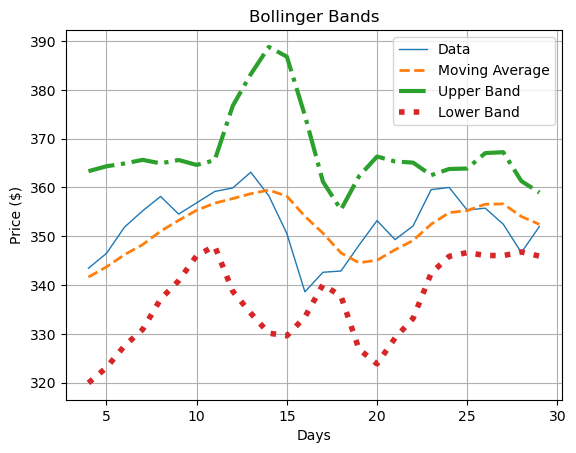

In [8]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

N = 5

# Calculate weights for moving average
weights = np.ones(N) / N
print("Weights:", weights)

# Load closing prices from CSV
c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)

# Calculate Simple Moving Average (SMA)
sma = np.convolve(weights, c, mode='valid')

# Calculate the standard deviation (deviation)
deviation = []
C = len(c)

for i in range(N - 1, C):
    if i + N <= C:
        dev = c[i: i + N]
    else:
        dev = c[-N:]
        
    averages = np.full(N, sma[i - N + 1])
    dev = dev - averages
    dev = dev ** 2
    dev = np.sqrt(np.mean(dev))
    deviation.append(dev)

deviation = 2 * np.array(deviation)
print("Length of deviation:", len(deviation), "Length of SMA:", len(sma))

# Calculate upper and lower Bollinger Bands
upperBB = sma + deviation
lowerBB = sma - deviation

# Slice the closing prices to match SMA and Bollinger Bands length
c_slice = c[N-1:]
between_bands = np.where((c_slice < upperBB) & (c_slice > lowerBB))

print("Lower Band:", lowerBB[between_bands])
print("Close Prices Between Bands:", c[between_bands])
print("Upper Band:", upperBB[between_bands])
between_bands_count = len(np.ravel(between_bands))
print("Ratio between bands:", float(between_bands_count) / len(c_slice))

# Plot the results
t = np.arange(N - 1, C)
plt.plot(t, c_slice, lw=1.0, label='Data')
plt.plot(t, sma, '--', lw=2.0, label='Moving Average')
plt.plot(t, upperBB, '-.', lw=3.0, label='Upper Band')
plt.plot(t, lowerBB, ':', lw=4.0, label='Lower Band')
plt.title('Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()
plt.show()


Weights: [0.11405072 0.14644403 0.18803785 0.24144538 0.31002201]


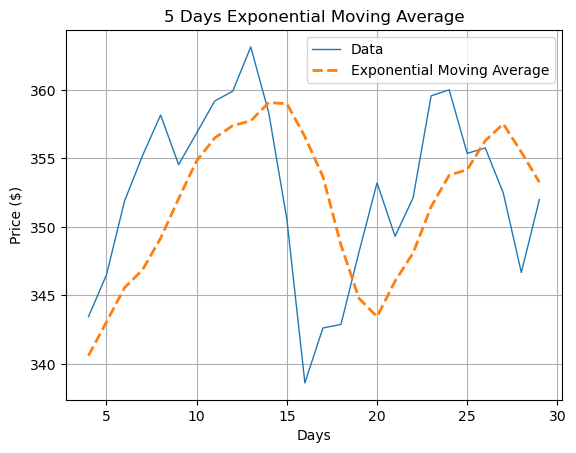

In [10]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# Example data for demonstration
# x = np.arange(5)
# print("Exp", np.exp(x))
# print("Linspace", np.linspace(-1, 0, 5))

# Calculate weights for Exponential Moving Average (EMA)
N = 5
weights = np.exp(np.linspace(-1., 0., N))

# Normalize weights
weights /= weights.sum()
print("Weights:", weights)

# Load closing prices from CSV
c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)

# Calculate EMA
ema = np.convolve(c, weights, mode='valid')

# Time range for plotting
t = np.arange(N - 1, len(c))

# Plot the results
plt.plot(t, c[N-1:], lw=1.0, label='Data')
plt.plot(t, ema, '--', lw=2.0, label='Exponential Moving Average')
plt.title('5 Days Exponential Moving Average')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()


In [12]:
import numpy as np

# Create a 2x2 identity matrix
data = np.eye(2)

# Save the matrix to a text file
np.savetxt("eye.txt", data)

# Load the matrix from the text file
loaded_data = np.genfromtxt("eye.txt")

# Print the loaded data
print(loaded_data)


[[1. 0.]
 [0. 1.]]


In [14]:
from __future__ import print_function
import numpy as np

# Load the closing prices from CSV
c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)

# Initialize estimates array
estimates = np.zeros((len(c), 3))

for i in range(len(c)):
    # Create a temporary copy and omit one value
    a = c.copy()
    a[i] = np.nan

    # Compute estimates
    estimates[i,] = [np.nanmean(a), np.nanvar(a), np.nanstd(a)]

# Print the variance of the estimates along the specified axis
print("Estimates variance:", estimates.var(axis=0))


Estimates variance: [0.05960347 3.63062943 0.01868965]


In [16]:
from __future__ import print_function
import numpy as np

N = 5

# Load closing prices from CSV
c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)

# Ensure there are enough data points
if len(c) < N + 1:
    raise ValueError("Not enough data points to perform the calculation.")

# Extract the last N closing prices and reverse the order
b = c[-N:][::-1]
print("b:", b)

# Initialize an N by N matrix with zeros
A = np.zeros((N, N), float)
print("Zeros N by N:", A)

# Fill the matrix with the appropriate values
for i in range(N):
    A[i, ] = c[-N - 1 - i: -1 - i]

print("A:", A)

# Perform linear least squares calculation
(x, residuals, rank, s) = np.linalg.lstsq(A, b, rcond=None)

print("x:", x)
print("Residuals:", residuals)
print("Rank:", rank)
print("Singular values:", s)

# Print the dot product of b and x
print("Dot product of b and x:", np.dot(b, x))


b: [351.99 346.67 352.47 355.76 355.36]
Zeros N by N: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
A: [[360.   355.36 355.76 352.47 346.67]
 [359.56 360.   355.36 355.76 352.47]
 [352.12 359.56 360.   355.36 355.76]
 [349.31 352.12 359.56 360.   355.36]
 [353.21 349.31 352.12 359.56 360.  ]]
x: [ 0.78111069 -1.44411737  1.63563225 -0.89905126  0.92009049]
Residuals: []
Rank: 5
Singular values: [1.77736601e+03 1.49622969e+01 8.75528492e+00 5.15099261e+00
 1.75199608e+00]
Dot product of b and x: 357.93916101523365


In [18]:
from __future__ import print_function
import numpy as np

# Create an array with values from 0 to 4
a = np.arange(5)
print("a =", a)

# Clip the values to be within the interval [1, 2]
print("Clipped:", a.clip(1, 2))

# Create another array with values from 0 to 3
a = np.arange(4)
print("a =", a)

# Compress the array to include only values greater than 2
print("Compressed:", a.compress(a > 2))

# Create an array with values from 1 to 8
b = np.arange(1, 9)
print("b =", b)

# Compute the product of all elements in the array
print("Factorial:", b.prod())

# Compute the cumulative product of the array elements
print("Factorials:", b.cumprod())


a = [0 1 2 3 4]
Clipped: [1 1 2 2 2]
a = [0 1 2 3]
Compressed: [3]
b = [1 2 3 4 5 6 7 8]
Factorial: 40320
Factorials: [    1     2     6    24   120   720  5040 40320]


In [20]:
from __future__ import print_function
import numpy as np

# Load the high and low prices from the CSV file
h, l = np.loadtxt('data.csv', delimiter=',', usecols=(4, 5), unpack=True)

# Calculate and print the highest high price
print("Highest high price:", np.max(h))

# Calculate and print the lowest low price
print("Lowest low price:", np.min(l))

# Calculate and print the midpoint between the highest high and the lowest low prices
midpoint = (np.max(h) + np.min(l)) / 2
print("Midpoint:", midpoint)

# Calculate and print the spread (peak-to-peak) of the high prices
print("Spread high price:", np.ptp(h))

# Calculate and print the spread (peak-to-peak) of the low prices
print("Spread low price:", np.ptp(l))


Highest high price: 364.9
Lowest low price: 333.53
Midpoint: 349.215
Spread high price: 24.859999999999957
Spread low price: 26.970000000000027


In [22]:
from __future__ import print_function
import numpy as np

# Load closing prices from CSV
c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)

# Calculate daily returns
returns = np.diff(c) / c[:-1]
print("Standard deviation of returns:", np.std(returns))

# Calculate daily log returns
logreturns = np.diff(np.log(c))

# Find indices with positive returns
posretindices = np.where(returns > 0)
print("Indices with positive returns:", posretindices)

# Calculate annual volatility
annual_volatility = np.std(logreturns) / np.mean(logreturns)
annual_volatility = annual_volatility / np.sqrt(1./252.)
print("Annual volatility:", annual_volatility)

# Calculate monthly volatility
monthly_volatility = annual_volatility * np.sqrt(1./12.)
print("Monthly volatility:", monthly_volatility)


Standard deviation of returns: 0.012922134436826306
Indices with positive returns: (array([ 0,  1,  4,  5,  6,  7,  9, 10, 11, 12, 16, 17, 18, 19, 21, 22, 23,
       25, 28]),)
Annual volatility: 129.27478991115132
Monthly volatility: 37.318417377317765


In [24]:
import numpy as np

# Create a 2x2 identity matrix
i2 = np.eye(2)
print("Identity Matrix:\n", i2)

# Save the identity matrix to a text file
np.savetxt("eye.txt", i2)


Identity Matrix:
 [[1. 0.]
 [0. 1.]]


Weights: [0.2 0.2 0.2 0.2 0.2]


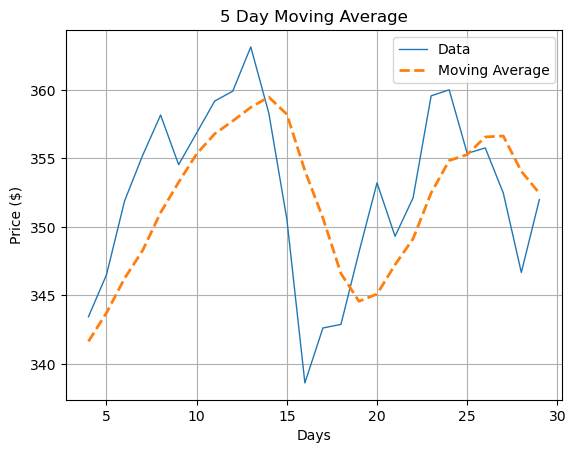

In [28]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# Number of days for moving average
N = 5

# Calculate weights for the moving average
weights = np.ones(N) / N
print("Weights:", weights)

# Load closing prices from CSV file
c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)

# Compute the simple moving average
sma = np.convolve(c, weights, mode='valid')

# Time range for plotting
t = np.arange(N - 1, len(c))

# Plot the original data and the moving average
plt.plot(t, c[N-1:], lw=1.0, label="Data")
plt.plot(t, sma, '--', lw=2.0, label="Moving Average")
plt.title("5 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()


Pivots: [338.01       337.88666667 343.88666667 344.37333333 342.07666667
 345.57       350.92333333 354.29       357.34333333 354.18
 356.06333333 358.45666667 359.14       362.84333333 358.36333333
 353.19333333 340.57666667 341.95666667 342.13333333 347.13
 353.12666667 350.90333333 351.62333333 358.42333333 359.34666667
 356.11333333 355.13666667 352.61       347.11333333 349.77      ]
Condition: [False False  True  True  True  True  True False False  True False False
 False False False  True False False False  True  True  True  True False
 False  True  True  True False  True]
Support levels between bands: [341.92421382 342.19081893 342.45742405 342.72402917 342.99063429
 343.79044964 345.39008034 346.4565008  346.72310592 346.98971104
 347.25631615 348.0561315  348.32273662 348.58934174 349.12255197]
Close prices between bands: [345.03 344.32 343.44 346.5  351.88 354.54 350.56 348.16 353.21 349.31
 352.12 355.36 355.76 352.47 351.99]
Resistance levels between bands: [352.61688271 

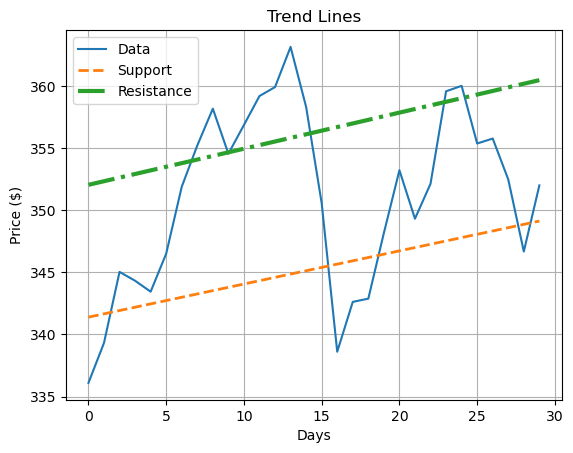

In [30]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

def fit_line(t, y):
    ''' Fits t to a line y = at + b '''
    A = np.vstack([t, np.ones_like(t)]).T
    return np.linalg.lstsq(A, y, rcond=None)[0]

# Load high, low, and close prices from CSV
h, l, c = np.loadtxt('data.csv', delimiter=',', usecols=(4, 5, 6), unpack=True)

# Calculate pivot points
pivots = (h + l + c) / 3
print("Pivots:", pivots)

# Fit trend lines
t = np.arange(len(c))
sa, sb = fit_line(t, pivots - (h - l))
ra, rb = fit_line(t, pivots + (h - l))

support = sa * t + sb
resistance = ra * t + rb

# Determine condition where close price is between support and resistance
condition = (c > support) & (c < resistance)
print("Condition:", condition)
between_bands = np.where(condition)
print("Support levels between bands:", support[between_bands])
print("Close prices between bands:", c[between_bands])
print("Resistance levels between bands:", resistance[between_bands])
between_bands_count = len(np.ravel(between_bands))
print("Number of points between bands:", between_bands_count)
print("Ratio of points between bands:", float(between_bands_count) / len(c))

# Calculate tomorrow's support and resistance levels
tomorrows_support = sa * (t[-1] + 1) + sb
tomorrows_resistance = ra * (t[-1] + 1) + rb
print("Tomorrow's support:", tomorrows_support)
print("Tomorrow's resistance:", tomorrows_resistance)

# Second approach to count points between bands
a1 = c[c > support]
a2 = c[c < resistance]
print("Number of points between bands (2nd approach):", len(np.intersect1d(a1, a2)))

# Plotting the data along with support and resistance lines
plt.plot(t, c, label='Data')
plt.plot(t, support, '--', lw=2.0, label='Support')
plt.plot(t, resistance, '-.', lw=3.0, label='Resistance')
plt.title('Trend Lines')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()
plt.show()


In [32]:
from __future__ import print_function
import numpy as np

# Load closing prices and volumes from CSV file
c, v = np.loadtxt('data.csv', delimiter=',', usecols=(6, 7), unpack=True)

# Calculate VWAP (Volume Weighted Average Price)
vwap = np.average(c, weights=v)
print("VWAP =", vwap)

# Calculate the arithmetic mean of the closing prices
mean_price = np.mean(c)
print("Mean =", mean_price)

# Calculate TWAP (Time Weighted Average Price)
t = np.arange(len(c))
twap = np.average(c, weights=t)
print("TWAP =", twap)


VWAP = 350.5895493532009
Mean = 351.0376666666667
TWAP = 352.4283218390804


In [40]:
from __future__ import print_function
import numpy as np
from datetime import datetime

# Function to convert date string to weekday number
def datestr2num(s):
    return datetime.strptime(s.decode('utf-8'), "%d-%m-%Y").weekday()

# Load dates and closing prices from CSV file
data = np.genfromtxt('data.csv', delimiter=',', usecols=(1, 6), converters={1: datestr2num}, dtype=None, encoding=None)

dates = data[:, 0]
close = data[:, 1]

print("Dates =", dates)

# Initialize array to hold average closing prices for each weekday
averages = np.zeros(5)

# Calculate average closing price for each weekday
for i in range(5):
    indices = np.where(dates == i)
    prices = close[indices]
    avg = np.mean(prices)
    print("Day", i, "prices", prices, "Average", avg)
    averages[i] = avg

# Find the day with the highest average closing price
top = np.max(averages)
print("Highest average", top)
print("Top day of the week", np.argmax(averages))

# Find the day with the lowest average closing price
bottom = np.min(averages)
print("Lowest average", bottom)
print("Bottom day of the week", np.argmin(averages))


AttributeError: 'str' object has no attribute 'decode'

In [44]:
from __future__ import print_function
import numpy as np
from datetime import datetime

# Function to convert date string to weekday number
def datestr2num(s):
    return datetime.strptime(s, "%d-%m-%Y").weekday()

# Load dates and closing prices from CSV file
data = np.genfromtxt('data.csv', delimiter=',', usecols=(1, 6), converters={1: datestr2num}, dtype=None, encoding='utf-8')

# Extract dates and close prices
dates = np.array([row[0] for row in data])
close = np.array([row[1] for row in data])

print("Dates =", dates)

# Initialize array to hold average closing prices for each weekday
averages = np.zeros(5)

# Calculate average closing price for each weekday
for i in range(5):
    indices = np.where(dates == i)
    prices = close[indices]
    avg = np.mean(prices)
    print("Day", i, "prices", prices, "Average", avg)
    averages[i] = avg

# Find the day with the highest average closing price
top = np.max(averages)
print("Highest average", top)
print("Top day of the week", np.argmax(averages))

# Find the day with the lowest average closing price
bottom = np.min(averages)
print("Lowest average", bottom)
print("Bottom day of the week", np.argmin(averages))


Dates = [4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 1 2 3 4 0 1 2 3 4 0 1 2 3 4]
Day 0 prices [339.32 351.88 359.18 353.21 355.36] Average 351.7900000000001
Day 1 prices [345.03 355.2  359.9  338.61 349.31 355.76] Average 350.63500000000005
Day 2 prices [344.32 358.16 363.13 342.62 352.12 352.47] Average 352.1366666666666
Day 3 prices [343.44 354.54 358.3  342.88 359.56 346.67] Average 350.8983333333333
Day 4 prices [336.1  346.5  356.85 350.56 348.16 360.   351.99] Average 350.0228571428571
Highest average 352.1366666666666
Top day of the week 2
Lowest average 350.0228571428571
Bottom day of the week 4


In [50]:
from __future__ import print_function
import numpy as np
from datetime import datetime

# Monday 0
# Tuesday 1
# Wednesday 2
# Thursday 3
# Friday 4
# Saturday 5
# Sunday 6
def datestr2num(s):
    return datetime.strptime(s, "%d-%m-%Y").date().weekday()

# Load the data, skip the header
data = np.genfromtxt('data.csv', delimiter=',', dtype=None, encoding='utf-8', skip_header=1, converters={1: datestr2num})

# Extract columns, the date is now the first column and rest are numerical columns
dates = np.array([row[1] for row in data])
open = np.array([row[3] for row in data])
high = np.array([row[4] for row in data])
low = np.array([row[5] for row in data])
close = np.array([row[6] for row in data])

# For demonstration, limit to the first 16 entries
close = close[:16]
dates = dates[:16]

# get first Monday
first_monday = np.ravel(np.where(dates == 0))[0]
print("The first Monday index is", first_monday)

# get last Friday
last_friday = np.ravel(np.where(dates == 4))[-1]
print("The last Friday index is", last_friday)

weeks_indices = np.arange(first_monday, last_friday + 1)
print("Weeks indices initial", weeks_indices)

weeks_indices = np.split(weeks_indices, 3)
print("Weeks indices after split", weeks_indices)

def summarize(a, o, h, l, c):
    monday_open = o[a[0]]
    week_high = np.max(np.take(h, a))
    week_low = np.min(np.take(l, a))
    friday_close = c[a[-1]]
    return ("APPL", monday_open, week_high, week_low, friday_close)

weeksummary = np.apply_along_axis(summarize, 1, weeks_indices, open, high, low, close)
print("Week summary", weeksummary)

np.savetxt("weeksummary.csv", weeksummary, delimiter=",", fmt="%s")


The first Monday index is 0
The last Friday index is 14
Weeks indices initial [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Weeks indices after split [array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9]), array([10, 11, 12, 13, 14])]
Week summary [['APPL' '335.8' '346.7' '334.3' '346.5']
 ['APPL' '347.89' '360.0' '347.64' '356.85']
 ['APPL' '356.79' '364.9' '349.52' '350.56']]
